# **IMPORTS**

In [379]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

```
⠀⠀⠀⠀⠀⠀⣀⣤⡤
⠀⠀⠀⠀⢀⣾⣿⠋
⠀⠀⠀⣠⣾⣿⡟
⠀⠀⢸⠛⠉⢹⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⡠⠄⠠⣀
⠀⠀⡘⠀⠀⠀⡀⠀⠀⠀⠀⠀⠀⠀⠀⣠⠖⠉⠀⠀⠀⣾⣿⣦⡀
⠀⠀⡇⠀⠀⠀⢡⠄⠀⠀⣀⣀⣀⣠⠊⠀⠀⠀⠀⡠⠞⠛⠛⠛⠛⡀
⠀⠀⢃⠀⠀⠀⠀⠗⠚⠉⠉⠀⠈⠁⠀⠀⠀⢀⡔⠁⠀
⠀⠀⠸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣴⣶⣄⠲⡎
⠀⠀⠀⠃⠀⠀⢠⣤⡀⠀⠀⠀⠀⣿⣿⣿⠀⠘⡄
⠀⠀⠀⡆⠀⠀⣿⣿⡇⠀⠀⠀⠀⠈⠛⠉⣴⣆⢹⡄
⠀⠀⠀⣇⢰⡧⣉⡉⠀⠀⢀⡀⠀⣀⣀⣠⣿⡷⢠⡇
⠀⠀⠀⢻⠘⠃⠈⠻⢦⠞⠋⠙⠺⠋⠉⠉⠉⢡⠟
⠀⠀⠀⠀⠳⢄⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢠⠋⠀⠀
```

## **SETTINGS**
---

In [380]:
# Matplotlib inline to visualize Matplotlib graphs
%matplotlib inline

# Configuration to set so that all the Seaborn figures come out with this size
%config Inlinebackend.figure_format= 'retina'

In [381]:
# Set the Seaborn context to "poster" for larger text and figures
sns.set_context("poster")

# Set the default figure size for Seaborn plots
sns.set(rc={"figure.figsize": (12., 6.)})

# Set the Seaborn style to "whitegrid" for a white background with gridlines
sns.set_style("whitegrid")

In [382]:
# Set the max displayable columns to max
pd.set_option('display.max_columns', None)

---

# **DATAFRAME**

In [383]:
path= "data/cleaned_data.csv"
data= pd.read_csv(path)

In [384]:
df= pd.DataFrame(data)
df.head(3)

,ISRC,Track,Artist,Release Date,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Explicit Track
0,QM24S2402528,MILLION DOLLAR BABY,Tommy Richman,2024-04-26,725.4,390470936.0,30716.0,196631588.0,92.0,84274754.0,1713126.0,5767700.0,651565900.0,5.332282e+09,150597040.0,0
1,USUG12400910,Not Like Us,Kendrick Lamar,2024-05-04,545.9,323703884.0,28113.0,174597137.0,92.0,116347040.0,3486739.0,674700.0,35223547.0,2.083390e+08,156380351.0,1
2,QZJ842400387,i like the way you kiss me,Artemas,2024-03-19,538.4,601309283.0,54331.0,211607669.0,92.0,122599116.0,2228730.0,3025400.0,275154237.0,3.369121e+09,373784955.0,0


---

### Simple Checking / Understanding the data

In [385]:
print(f"Rows: {df.shape[0]}\nColumns: {df.shape[1]}")

Rows: 4576
Columns: 16


In [386]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4576 entries, 0 to 4575
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ISRC                    4576 non-null   object 
 1   Track                   4576 non-null   object 
 2   Artist                  4575 non-null   object 
 3   Release Date            4576 non-null   object 
 4   Track Score             4576 non-null   float64
 5   Spotify Streams         4485 non-null   float64
 6   Spotify Playlist Count  4528 non-null   float64
 7   Spotify Playlist Reach  4526 non-null   float64
 8   Spotify Popularity      3794 non-null   float64
 9   YouTube Views           4290 non-null   float64
 10  YouTube Likes           4283 non-null   float64
 11  TikTok Posts            3425 non-null   float64
 12  TikTok Likes            3618 non-null   float64
 13  TikTok Views            3617 non-null   float64
 14  YouTube Playlist Reach  3589 non-null   

>We have few null values on columns like `Spotify Popularity`, the `TikTok` columns and `YouTube Playlist Reach`. But it doesn't affect our research too much since we have enough data.

In [387]:
df.eq(" ").sum()

ISRC                      0
Track                     0
Artist                    0
Release Date              0
Track Score               0
Spotify Streams           0
Spotify Playlist Count    0
Spotify Playlist Reach    0
Spotify Popularity        0
YouTube Views             0
YouTube Likes             0
TikTok Posts              0
TikTok Likes              0
TikTok Views              0
YouTube Playlist Reach    0
Explicit Track            0
dtype: int64

## Data Completeness
- Total rows (after cleaning): ~4,500  
- Key metrics have high but varying completeness:
  - `Spotify Streams`: 4,485 non-null
  - `YouTube Views`: 4,290 non-null
  - `TikTok Views`: 3,617 non-null
- Other columns (e.g., `Spotify Popularity`, `YouTube Playlist Reach`) have moderate missingness but remain usable for subset analyses ~~seen before on df.info()~~.

In [388]:
round(df.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Track Score,4576.0,4.186000e+01,3.862000e+01,19.4,23.30,29.9,4.450000e+01,7.254000e+02
Spotify Streams,4485.0,4.474069e+08,5.385504e+08,1071.0,70354552.00,239850720.0,6.291025e+08,4.281469e+09
Spotify Playlist Count,4528.0,5.939751e+04,7.114560e+04,1.0,6705.00,32312.5,8.608325e+04,5.903920e+05
Spotify Playlist Reach,4526.0,2.335177e+07,2.969279e+07,1.0,4789848.50,13264111.5,2.966802e+07,2.623434e+08
Spotify Popularity,3794.0,6.350000e+01,1.619000e+01,1.0,61.00,67.0,7.300000e+01,9.600000e+01
YouTube Views,4290.0,4.027841e+08,7.020105e+08,913.0,40756124.25,148269610.0,4.646921e+08,1.632276e+10
YouTube Likes,4283.0,2.930659e+06,4.594517e+06,25.0,409749.50,1257935.0,3.575526e+06,6.231118e+07
TikTok Posts,3425.0,9.448117e+05,2.442704e+06,1.0,38115.00,182529.0,7.956030e+05,4.290000e+07
TikTok Likes,3618.0,1.126902e+08,5.499597e+08,3.0,5810119.50,26576921.5,9.333136e+07,2.347422e+10
TikTok Views,3617.0,1.161724e+09,5.883161e+09,19.0,58980168.00,266064027.0,9.145973e+08,2.332323e+11


## Core Metadata

| Column | Type | Description |
|--------|------|-------------|
| **ISRC** | String (Index) | International Standard Recording Code — a unique identifier for sound recordings. Used as the dataset index. |
| **Track** | String | Title of the song. |
| **Artist** | String | Primary artist or group name. May be missing (`NaN`) for a small number of entries. |
| **Release Date** | DateTime | Official release date of the track (formatted as `YYYY-MM-DD`). |
| **Track Score** | Float | Composite score (0–1000+) reflecting overall popularity and cross-platform performance. |
| **Explicit Track** | Boolean (0/1) | Flag indicating explicit content: `1` = explicit, `0` = clean. |

---

## Spotify Metrics

| Column | Type | Description |
|--------|------|-------------|
| **Spotify Streams** | Float | Total number of on-demand audio streams on Spotify. |
| **Spotify Playlist Count** | Float | Number of Spotify playlists the track appears in. |
| **Spotify Playlist Reach** | Float | Estimated total number of unique users who saw the track in a Spotify playlist. |
| **Spotify Popularity** | Float | Spotify’s internal popularity index (0–100), where 100 = most popular. Updated frequently. |

---

## YouTube Metrics

| Column | Type | Description |
|--------|------|-------------|
| **YouTube Views** | Float | Total number of views on the official or primary YouTube video. |
| **YouTube Likes** | Float | Total number of likes on the YouTube video. |
| **YouTube Playlist Reach** | Float | Estimated number of unique users who saw the track in a YouTube playlist or recommendation. |

---

## TikTok Metrics

| Column | Type | Description |
|--------|------|-------------|
| **TikTok Views** | Float | Total number of views of videos using this track as audio. |
| **TikTok Likes** | Float | Total likes on TikTok videos using this audio. |
| **TikTok Posts** | Float | Number of TikTok videos created using this track. |

---

### Separating numerical columns and categorical columns

In [389]:
# Explicit Track is numerical type, so we change it first to bool
df["Explicit Track"]= df["Explicit Track"].astype(bool)

In [437]:
df["Release Date"]= pd.to_datetime(df["Release Date"], errors= "coerce")
df["Release Date"].dtype

dtype('<M8[ns]')

In [ ]:
# Getting categorical columns [strings, bools, categories]
cat_cols = df.select_dtypes(include=["object", "bool", "category", "datetime64[ns]"])

# Getting numerical columns [floats]
num_cols= df.select_dtypes(include= "number").select_dtypes(exclude="bool")

In [393]:
print(f"Categorical columns: {cat_cols.columns}\n\nNumerical columns: {num_cols.columns}")

Categorical columns: Index(['ISRC', 'Track', 'Artist', 'Release Date', 'Explicit Track'], dtype='object')

Numerical columns: Index(['Track Score', 'Spotify Streams', 'Spotify Playlist Count',
       'Spotify Playlist Reach', 'Spotify Popularity', 'YouTube Views',
       'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views',
       'YouTube Playlist Reach'],
      dtype='object')


In [438]:
# To see it better
cat_cols.head(3)

,ISRC,Track,Artist,Release Date,Explicit Track
0,QM24S2402528,MILLION DOLLAR BABY,Tommy Richman,2024-04-26,False
1,USUG12400910,Not Like Us,Kendrick Lamar,2024-05-04,True
2,QZJ842400387,i like the way you kiss me,Artemas,2024-03-19,False


In [439]:
# To see it better
num_cols.head(3)

,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach
0,725.4,390470936.0,30716.0,196631588.0,92.0,84274754.0,1713126.0,5767700.0,651565900.0,5.332282e+09,150597040.0
1,545.9,323703884.0,28113.0,174597137.0,92.0,116347040.0,3486739.0,674700.0,35223547.0,2.083390e+08,156380351.0
2,538.4,601309283.0,54331.0,211607669.0,92.0,122599116.0,2228730.0,3025400.0,275154237.0,3.369121e+09,373784955.0


---

# Questions
### About music and their relationship across all platforms, we can search for very value information:

1. Which are the top 10 songs / artists on spotify

2. How does TikTok engagement correlate with traditional streaming platform success?

3. Which artists demonstrate the most effective multi-platform presence strategies?

4. What evolutionary patterns do the most streamed songs show year over year?

# Univariate Analysis

#### Which are the top 10 songs / artists on spotify


#### Functions

In [ ]:
# Func. to search for the top 10 artist of a concrete paltform
def top_10_artist(df, platform_col, artist_col="Artist"):
  top10= df.nlargest(10, platform_col)

  return top10[[artist_col, platform_col]]

In [ ]:
# Func. to search for the top 10 songs of a concrete paltform
def top_10_songs(df, platform_col, song_col="Track"):
  top10= df.nlargest(10, platform_col)

  return top10[[song_col, platform_col]]

In [430]:
# Func. to plot a barplot of top10 artists or songs from smallest to largest
def plot_top_10(df, platform_col, label_col="Artist", title=None, color="orange", figsize=(16, 8)):
  top10= df.nlargest(10, platform_col).copy()
  top10= top10.sort_values(platform_col, ascending=False)

  plt.figure(figsize=figsize)
  plt.barh(top10[label_col], top10[platform_col], color=color)

  plt.xlabel(platform_col)
  plt.ylabel("")
  plt.title(title or f"Top 10 {label_col}s on {platform_col.split()[0]}")
  plt.tight_layout()
  plt.show()

Top 10 artists and Top 10 songs

In [ ]:
# We search for the top10 artist using top_10_artist function
spotify_top10_artists= top_10_artist(df, "Spotify Streams")
youtube_top10_artists= top_10_artist(df, "YouTube Views")
tiktok_top10_artists= top_10_artist(df, "TikTok Views")

In [ ]:
# We search for the top10 songs using top_10_songs function
spotify_top10_songs= top_10_songs(df, "Spotify Streams")
youtube_top10_songs= top_10_songs(df, "YouTube Views")
tiktok_top10_songs= top_10_songs(df, "TikTok Views")

Seeing the results

In [ ]:
# We shou using display() the top 10 artists of each platform
display(pd.concat([
  spotify_top10_artists.reset_index(drop=True),
  youtube_top10_artists.reset_index(drop=True),
  tiktok_top10_artists.reset_index(drop=True)
], axis=1))

,Artist,Spotify Streams,Artist,YouTube Views,Artist,TikTok Views
0,The Weeknd,4.281469e+09,Pinkfong,1.632276e+10,Kevin MacLeod,2.332323e+11
1,xSyborg,4.261328e+09,Luis Fonsi,9.537136e+09,The King Khan & BBQ Show,2.148440e+11
2,Ed Sheeran,3.909459e+09,Ed Sheeran,8.013997e+09,Kreepa,6.108856e+10
3,xSyborg,3.888356e+09,Kids With Buns,6.736502e+09,Cavendish Music,3.837364e+10
4,Lewis Capaldi,3.427499e+09,Ed Sheeran,6.473699e+09,Tollan Kim,3.387079e+10
5,Post Malone,3.358704e+09,Wiz Khalifa,6.335990e+09,Dante9k,3.335940e+10
6,Harry Styles,3.301815e+09,PSY,5.849588e+09,Shayne Orok,3.320190e+10
7,Harry Styles,3.299082e+09,Mark Ronson,5.644117e+09,Danilo Stankovic,2.803270e+10
8,The Weeknd,3.291262e+09,Crazy Frog,5.049428e+09,CKay,2.393338e+10
9,Drake,3.192204e+09,El Chombo,5.004189e+09,The Kid LAROI,2.371238e+10


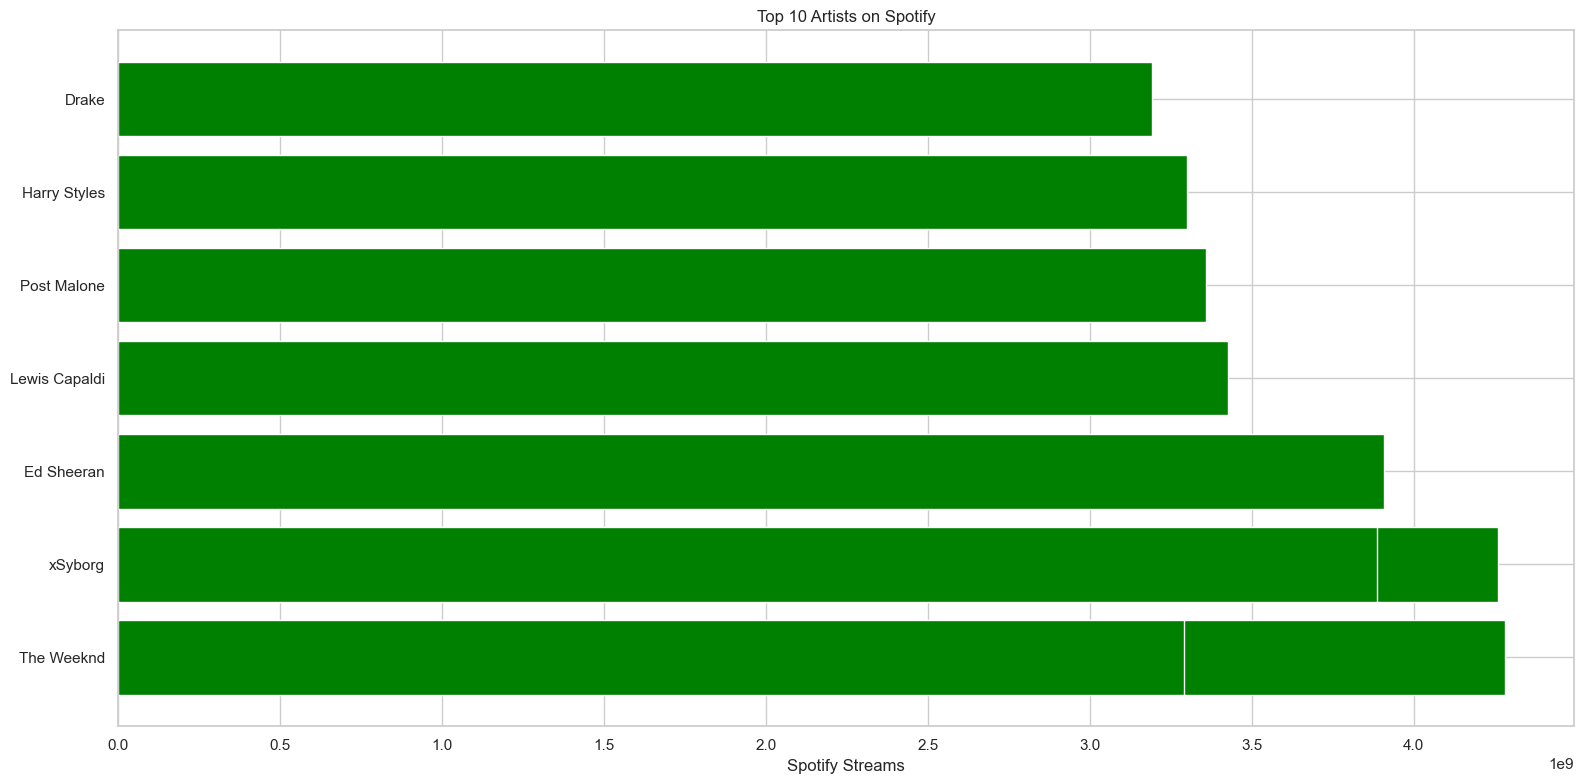

In [ ]:
plot_top_10(df, "Spotify Streams", "Artist", "Top 10 Artists on Spotify", color= "green")

1. **Drake** – 3,192,204,000 streams  
2. **The Weeknd** – 3,291,262,000 streams  
3. **Harry Styles** – 3,299,082,000 streams  
4. **Harry Styles** – 3,301,815,000 streams  
5. **Post Malone** – 3,358,704,000 streams  
6. **Lewis Capaldi** – 3,427,499,000 streams  
7. **xSyborg** – 3,888,356,000 streams  
8. **Ed Sheeran** – 3,909,459,000 streams  
9. **xSyborg** – 4,261,328,000 streams  
10. **The Weeknd** – 4,281,469,000 streams  

In [ ]:

# We shou using display() the top 10 songs of each platform
display(pd.concat([
  spotify_top10_songs.reset_index(drop=True),
  youtube_top10_songs.reset_index(drop=True),
  tiktok_top10_songs.reset_index(drop=True)
], axis=1))

,Track,Spotify Streams,Track,YouTube Views,Track,TikTok Views
0,Blinding Lights,4.281469e+09,Baby Shark,1.632276e+10,Monkeys Spinning Monkeys,2.332323e+11
1,Blinding Lights,4.261328e+09,Despacito,9.537136e+09,Love You So,2.148440e+11
2,Shape of You,3.909459e+09,Shape of You,8.013997e+09,Oh No,6.108856e+10
3,Shape of You,3.888356e+09,bathroom floor,6.736502e+09,Funny Song,3.837364e+10
4,Someone You Loved,3.427499e+09,Perfect,6.473699e+09,Aesthetic,3.387079e+10
5,Sunflower - Spider-Man: Into the Spider-Verse,3.358704e+09,See You Again (feat. Charlie Puth),6.335990e+09,Spongebob,3.335940e+10
6,As It Was,3.301815e+09,Gangnam Style (ï¿½ï¿½ï¿½ï¿½ï¿½ï,5.849588e+09,She Share Story,3.320190e+10
7,As It Was,3.299082e+09,Uptown Funk,5.644117e+09,Pieces,2.803270e+10
8,Starboy,3.291262e+09,Axel F,5.049428e+09,love nwantiti (ah ah ah),2.393338e+10
9,One Dance,3.192204e+09,Dame Tu Cosita,5.004189e+09,STAY (with Justin Bieber),2.371238e+10


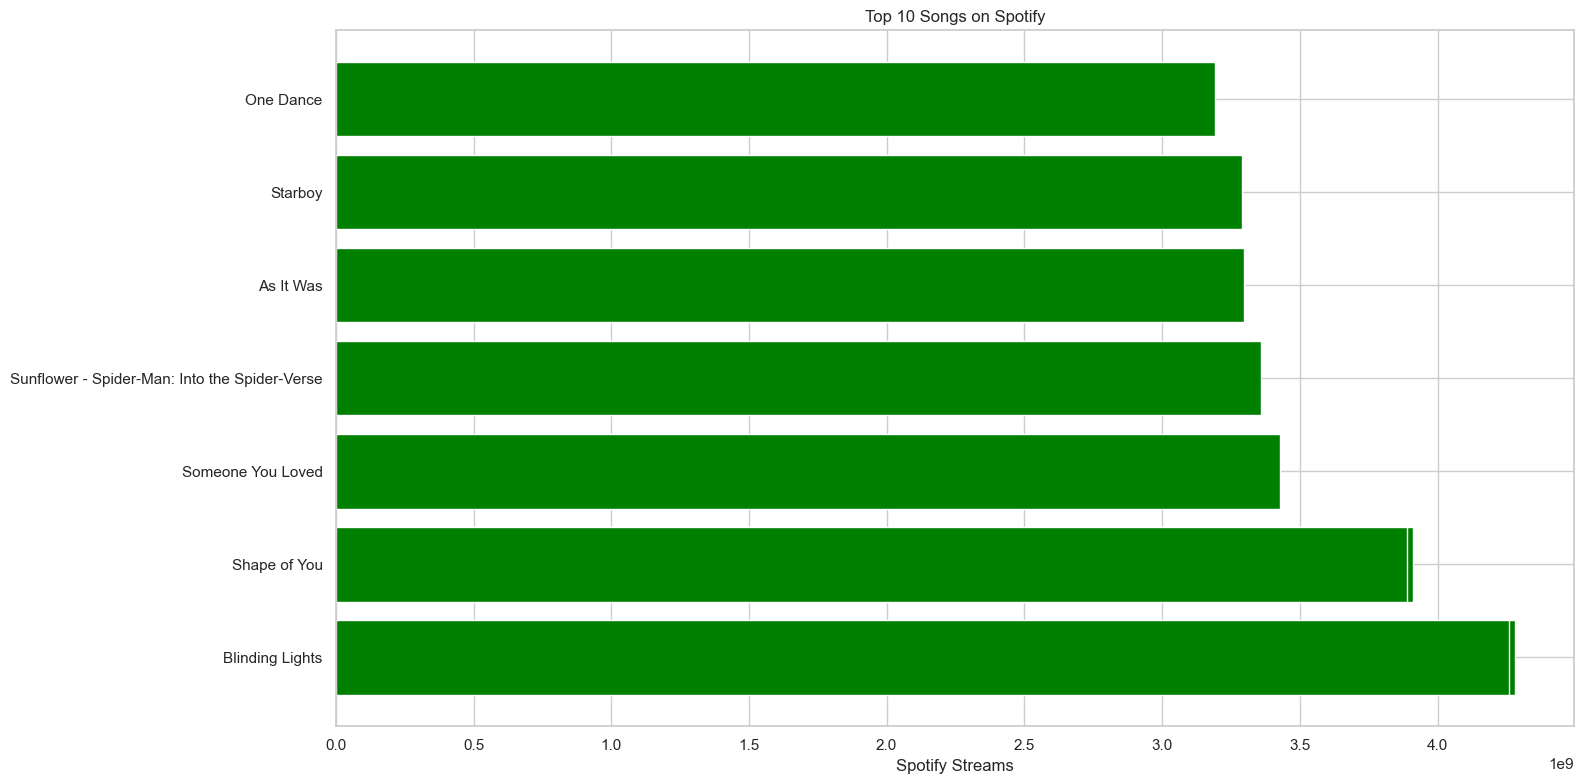

In [ ]:
# !!!
plot_top_10(df, "Spotify Streams", "Track", "Top 10 Songs on Spotify", color="green")

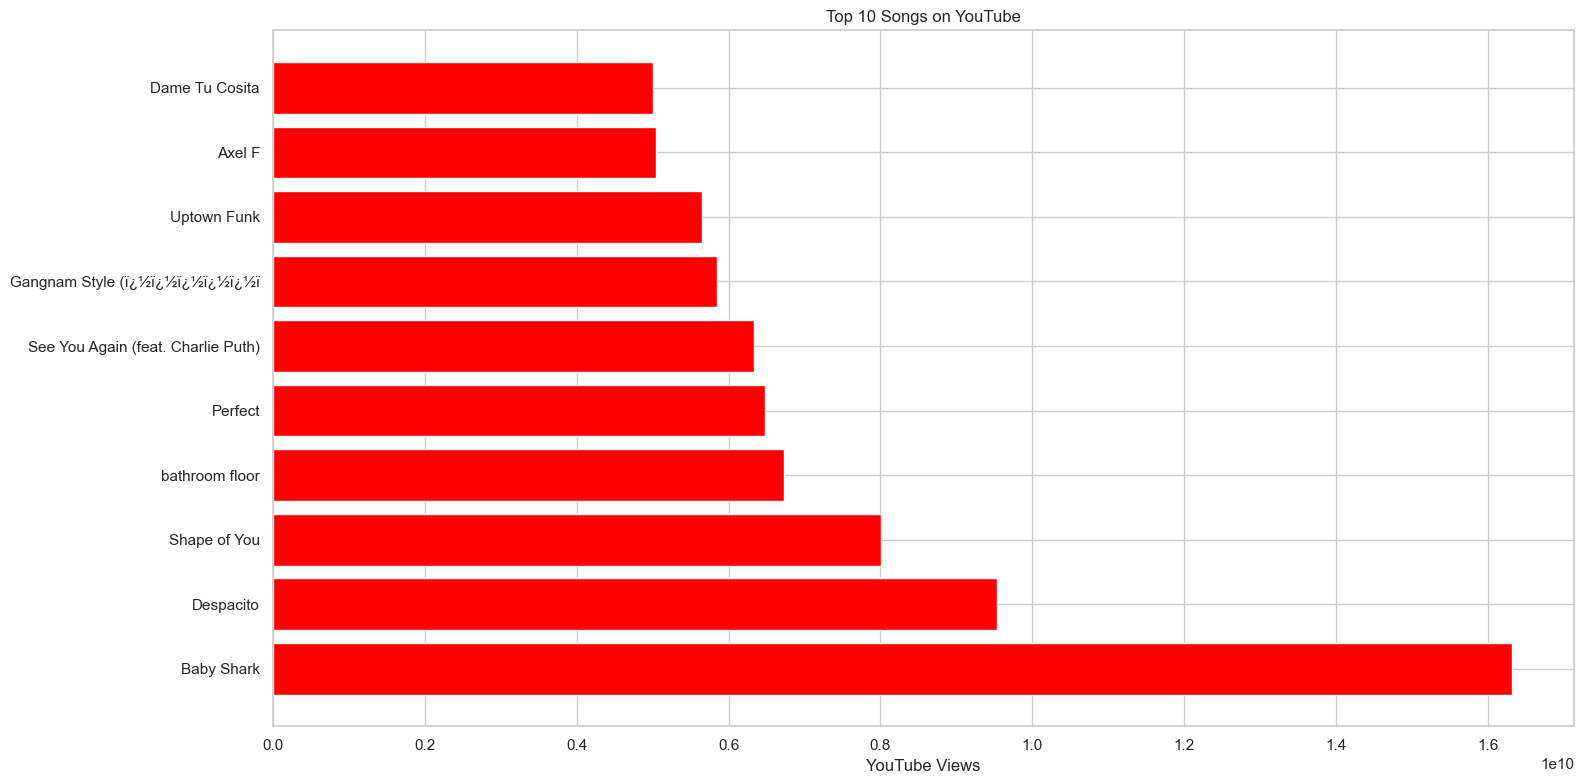

In [435]:
plot_top_10(df, "YouTube Views", "Track", "Top 10 Songs on YouTube", color="red")

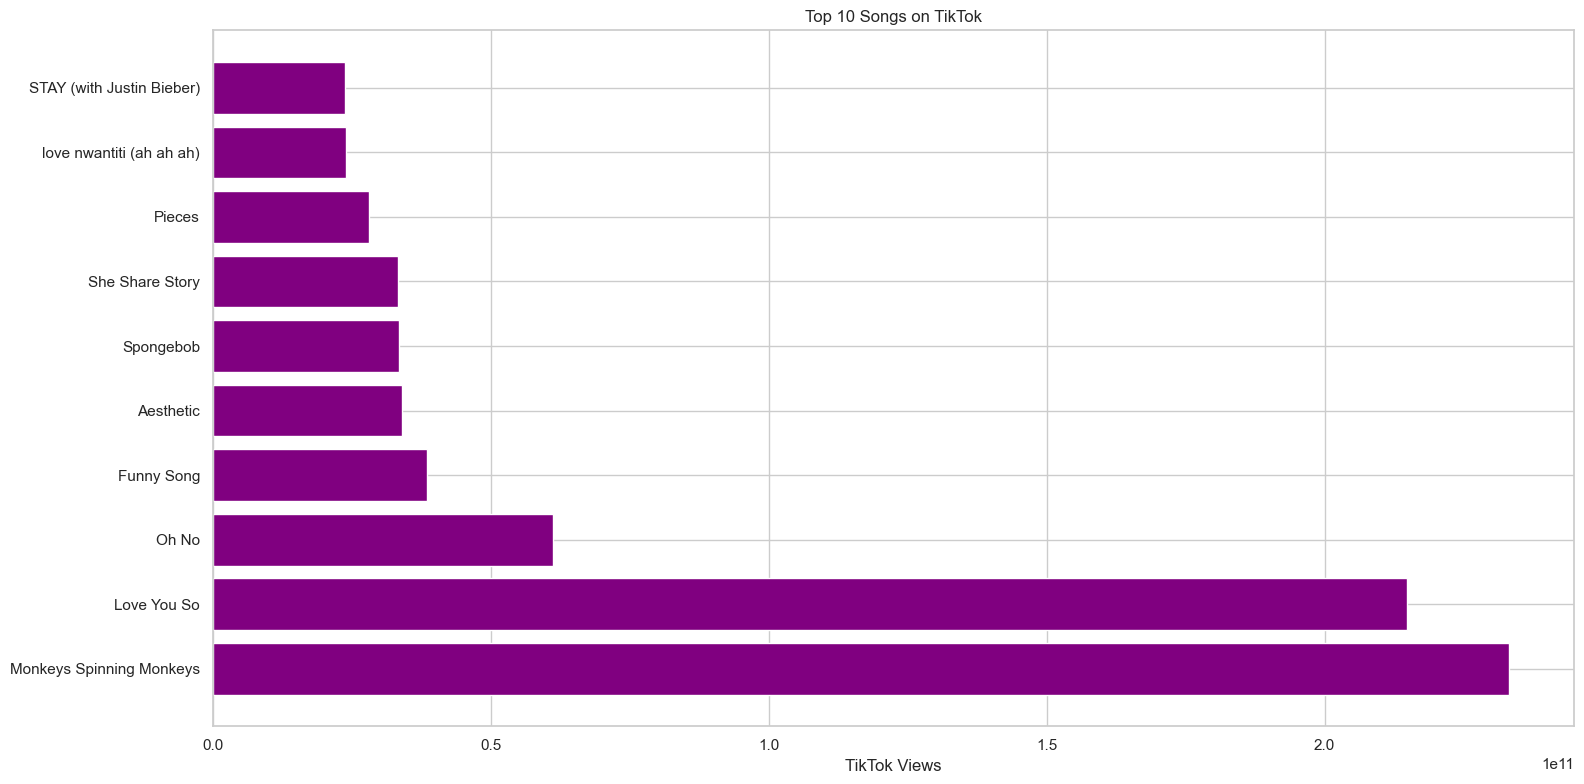

In [432]:
plot_top_10(df, "TikTok Views", "Track", "Top 10 Songs on TikTok", color="purple")

## Bivariate Analysis

How does TikTok engagement correlate with traditional streaming platform success?

## Spearman Correlation

We use **Spearman’s rank correlation** (instead of Pearson) to analyze the relationship between TikTok engagement and traditional streaming success for the following reasons:

- **Non-normal, highly skewed data**: Streaming metrics (e.g., Spotify Streams, TikTok Views) follow a power-law distribution—few tracks dominate, most have low values.
- **Monotonic, not necessarily linear relationships**: We expect that higher TikTok activity *tends* to associate with higher streaming numbers, but not in a strictly linear way.
- **Robustness to outliers**: Spearman uses ranks, making it insensitive to extreme values (e.g., a song with 200B TikTok views).
- **Ordinal interpretation**: The key question is whether songs with *higher* TikTok engagement also rank *higher* on Spotify/YouTube—exactly what Spearman measures.

Thus, Spearman provides a more accurate and reliable measure of association for this real-world music data.

In [441]:
target_cols= [
  "Spotify Streams", "YouTube Views",
  "TikTok Views", "TikTok Likes", "TikTok Posts"
]

In [442]:
df[target_cols].corr(method="spearman")

,Spotify Streams,YouTube Views,TikTok Views,TikTok Likes,TikTok Posts
Spotify Streams,1.000000,0.572200,0.322876,0.382492,0.204584
YouTube Views,0.572200,1.000000,0.187142,0.204386,0.197354
TikTok Views,0.322876,0.187142,1.000000,0.982499,0.839267
TikTok Likes,0.382492,0.204386,0.982499,1.000000,0.801988
TikTok Posts,0.204584,0.197354,0.839267,0.801988,1.000000


Spearman correlation analysis reveals a **moderate positive relationship** between TikTok engagement and Spotify success (ρ ≈ 0.32–0.38), with TikTok Likes being the strongest predictor. The association with YouTube is weaker (ρ ≈ 0.19–0.20), suggesting TikTok primarily influences audio streaming rather than video consumption.

## Impact of TikTok's Rise (2020–2024)

TikTok’s explosive growth since 2020 has fundamentally reshaped music discovery. Many songs now gain traction on TikTok *before* achieving mainstream success, creating a stronger correlation in recent years. Older tracks (pre-2020) rarely benefited from this dynamic, potentially diluting overall correlation estimates. Restricting analysis to 2020–2024 isolates the "TikTok era" and yields a more accurate picture of its true impact.

In [444]:
def spearman_corr_since_2020(df, date= "2020-01-01"):
  df_recent= df[pd.to_datetime(df["Release Date"])>= date]
  c= ["Spotify Streams", "YouTube Views", "TikTok Views", "TikTok Likes", "TikTok Posts"]

  return df_recent[c].corr(method="spearman")

In [ ]:
# 2020
spearman_corr_since_2020(df)

,Spotify Streams,YouTube Views,TikTok Views,TikTok Likes,TikTok Posts
Spotify Streams,1.000000,0.451961,0.372713,0.417862,0.155665
YouTube Views,0.451961,1.000000,0.261724,0.261767,0.194398
TikTok Views,0.372713,0.261724,1.000000,0.984627,0.865868
TikTok Likes,0.417862,0.261767,0.984627,1.000000,0.820713
TikTok Posts,0.155665,0.194398,0.865868,0.820713,1.000000


In [446]:
# 2021
spearman_corr_since_2020(df, "2021-01-01")

,Spotify Streams,YouTube Views,TikTok Views,TikTok Likes,TikTok Posts
Spotify Streams,1.000000,0.405296,0.374280,0.412573,0.132426
YouTube Views,0.405296,1.000000,0.276096,0.269693,0.187120
TikTok Views,0.374280,0.276096,1.000000,0.984819,0.863139
TikTok Likes,0.412573,0.269693,0.984819,1.000000,0.816257
TikTok Posts,0.132426,0.187120,0.863139,0.816257,1.000000


In [449]:
# 2022
spearman_corr_since_2020(df, "2022-01-01")

,Spotify Streams,YouTube Views,TikTok Views,TikTok Likes,TikTok Posts
Spotify Streams,1.000000,0.358425,0.340240,0.374886,0.108156
YouTube Views,0.358425,1.000000,0.248018,0.239005,0.171606
TikTok Views,0.340240,0.248018,1.000000,0.984012,0.856357
TikTok Likes,0.374886,0.239005,0.984012,1.000000,0.808701
TikTok Posts,0.108156,0.171606,0.856357,0.808701,1.000000


In [448]:
# 2023
spearman_corr_since_2020(df, "2023-01-01")

,Spotify Streams,YouTube Views,TikTok Views,TikTok Likes,TikTok Posts
Spotify Streams,1.000000,0.323523,0.285236,0.312395,0.089044
YouTube Views,0.323523,1.000000,0.238722,0.225716,0.194881
TikTok Views,0.285236,0.238722,1.000000,0.981838,0.845534
TikTok Likes,0.312395,0.225716,0.981838,1.000000,0.799314
TikTok Posts,0.089044,0.194881,0.845534,0.799314,1.000000


In [447]:
# 2024
spearman_corr_since_2020(df, "2024-01-01")

,Spotify Streams,YouTube Views,TikTok Views,TikTok Likes,TikTok Posts
Spotify Streams,1.000000,0.269385,0.264323,0.239427,0.242498
YouTube Views,0.269385,1.000000,0.267495,0.272634,0.266317
TikTok Views,0.264323,0.267495,1.000000,0.970859,0.621053
TikTok Likes,0.239427,0.272634,0.970859,1.000000,0.583528
TikTok Posts,0.242498,0.266317,0.621053,0.583528,1.000000


Spearman correlation analysis (2020–2024) reveals a **moderate but declining relationship** between TikTok engagement and traditional streaming success:

- **Spotify correlation** (TikTok Likes vs Streams):  
  - 2020: **0.418** → 2021: **0.413** → 2022: **0.375** → 2023: **0.312** → 2024: **0.239**  
- **YouTube correlation** remains consistently weaker (ρ ≈ 0.19–0.27).  
- In **2024**, `TikTok Posts` shows a notable rebound in correlation with Spotify (**0.242**), surpassing `TikTok Likes`.

The strongest TikTok–Spotify link occurred during **2020–2021**, coinciding with TikTok’s rise as a music discovery engine. The gradual decline through 2023 suggests market saturation, algorithm changes, or shifting user behavior. However, the 2024 uptick in `Posts` correlation hints at a **new dynamic**: active user participation (creating content) may now matter more than passive metrics (likes/views).